In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC # "Support vector 


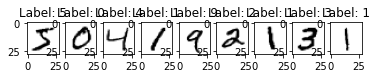

In [2]:
#dataset1
X_iris, y_iris = load_iris(return_X_y=True)
#dataset2
X_digits, y_digits = load_digits(return_X_y=True)
#dataset3
df = pd.read_csv('mnist.csv', header=None)
data = df.values

# 2.
y_mnist_labels = data[:, 0]
X_mnist_images = data[:, 1:]

df.iloc[:, 0].value_counts()

for index, (image, label) in enumerate(list(zip(X_mnist_images, y_mnist_labels))[:9]):
    image = image.reshape(28, 28)
    plt.subplot(1, 9, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Label: %i' % label)

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # "Support vector
from sklearn.tree import DecisionTreeClassifier

def get_acc_using_cross_validate(model, X, y, X_test, y_test):
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    # print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    
    y_pred = model.fit(X, y).predict(X_test)
    acc = (y_test ==y_pred).sum() / X_test.shape[0]
    return model, mean(scores), std(scores), acc
    
def class_with_5_models(X_input, y_input, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=0.3, random_state=42)

    gnb = GaussianNB()
    gnb, mean_score, std_score, acc = get_acc_using_cross_validate(gnb, X_train, y_train, X_test, y_test)
    print(f"{model_name} GaussianNB \t\tacc={acc}, cv mean score = {mean_score}")

    neigh = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree')
    neigh, mean_score, std_score, acc = get_acc_using_cross_validate(neigh, X_train, y_train, X_test, y_test)
    print(f"{model_name} KNeighborsClassifier\t acc={acc}, cv mean score = {mean_score}")

    svc = SVC(kernel='linear', C=0.1)
    svc, mean_score, std_score, acc = get_acc_using_cross_validate(svc, X_train, y_train, X_test, y_test)
    print(f"{model_name} SVM \t\t\tacc={acc}, cv mean score = {mean_score}")

    # 创建CART模型
    cart_model = DecisionTreeClassifier(criterion='gini')
    cart_model, mean_score, std_score, acc = get_acc_using_cross_validate(cart_model, X_train, y_train, X_test, y_test)
    print(f"{model_name} TreeCART \t\tacc={acc}, cv mean score = {mean_score}")


    # 创建基于信息增益的模型（类似C4.5）
    c45_model = DecisionTreeClassifier(criterion='entropy')
    c45_model, mean_score, std_score, acc = get_acc_using_cross_validate(c45_model, X_train, y_train, X_test, y_test)
    print(f"{model_name} Tree C4.5 \t\tacc={acc}, cv mean score = {mean_score}")

#dataset1    
class_with_5_models(X_iris, y_iris, "iris data:")

iris data: GaussianNB 		acc=0.9777777777777777, cv mean score = 0.9327272727272728
iris data: KNeighborsClassifier	 acc=1.0, cv mean score = 0.9418181818181818
iris data: SVM 			acc=1.0, cv mean score = 0.9618181818181817
iris data: TreeCART 		acc=1.0, cv mean score = 0.9336363636363638
iris data: Tree C4.5 		acc=1.0, cv mean score = 0.9245454545454546


In [4]:
#dataset3
class_with_5_models(X_mnist_images, y_mnist_labels, "mnist digits:")

mnist digits: GaussianNB 		acc=0.615, cv mean score = 0.6269047619047619
mnist digits: KNeighborsClassifier	 acc=0.9394444444444444, cv mean score = 0.9323809523809523
mnist digits: SVM 			acc=0.9266666666666666, cv mean score = 0.9302380952380952
mnist digits: TreeCART 		acc=0.7683333333333333, cv mean score = 0.7754761904761904
mnist digits: Tree C4.5 		acc=0.7966666666666666, cv mean score = 0.7769047619047619


In [5]:
#dataset2
class_with_5_models(X_digits, y_digits, "digits data:")

digits data: GaussianNB 		acc=0.8518518518518519, cv mean score = 0.8297587301587303
digits data: KNeighborsClassifier	 acc=0.9888888888888889, cv mean score = 0.9856698412698414
digits data: SVM 			acc=0.9796296296296296, cv mean score = 0.9817142857142859
digits data: TreeCART 		acc=0.8444444444444444, cv mean score = 0.8202222222222222
digits data: Tree C4.5 		acc=0.8740740740740741, cv mean score = 0.8511682539682539


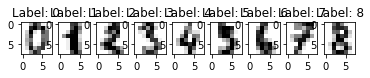

In [6]:
#observe dataset2
from sklearn import datasets
digits = datasets.load_digits()

for index, (image, label) in enumerate(list(zip(digits.images, digits.target))[:9]):
    plt.subplot(1, 9, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Label: %i' % label)

In [7]:
# !conda install -y scikit-image
from scipy.ndimage import rotate, shift
from skimage.util import random_noise, pad

def augment_image_8x8(image):
    image = image.reshape(8, 8)
    padded_image = np.pad(image, ((2, 2), (2, 2)), mode='constant')
    
    # rotate
    angle = np.random.uniform(-5, 5)  # This will generate a random float between -5 and 5
    rotated = rotate(padded_image, angle=angle, reshape=False)
    rotated = rotated[2:-2, 2:-2] 

    return rotated.reshape(64)

def augment_image_28x28(image):
    image = image.reshape(28, 28)
    padded_image = np.pad(image, ((2, 2), (2, 2)), mode='constant')

    angle = np.random.uniform(-6, 6)  
    rotated = rotate(padded_image, angle=angle, reshape=False)
    rotated = rotated[2:-2, 2:-2] 
        
#     # noise
#     noised = random_noise(rotated, mode='gaussian', var=0.01)

    return rotated.reshape(784)

# test
# image = digits.images[0]
# noised = augment_image(image)

def generate_datasets(X_digits, augment_func):
    # Dataset 1: Original dataset
    dataset_1 = X_digits
    
    # Dataset 2: Original + 1x Augmented
    augmented_1x = np.array([augment_func(img) for img in X_digits])
    dataset_2 = np.concatenate([X_digits, augmented_1x])
    
    # Dataset 3: Original + 1x Augmented + 2x Augmented
    augmented_2x = np.array([augment_func(img) for img in X_digits])
    dataset_3 = np.concatenate([X_digits, augmented_1x, augmented_2x])
    
    # Dataset 4: Original + 1x Augmented + 2x Augmented + 3x Augmented
    augmented_3x = np.array([augment_func(img) for img in X_digits])
    dataset_4 = np.concatenate([X_digits, augmented_1x, augmented_2x, augmented_3x])
    
    # Dataset 5: Original + 1x Augmented + 2x Augmented + 3x Augmented + 4x Augmented
    augmented_4x = np.array([augment_func(img) for img in X_digits])
    dataset_5 = np.concatenate([X_digits, augmented_1x, augmented_2x, augmented_3x, augmented_4x])
    
    return dataset_1, dataset_2, dataset_3, dataset_4, dataset_5
#dataset2 augment for train 
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=1)
X_datasets_digits = generate_datasets(X_train, augment_image_8x8)

In [8]:
from scipy.ndimage import gaussian_filter, map_coordinates
import numpy as np

def elastic_transform(image, alpha, sigma):
    random_state = np.random.RandomState(None)
    shape = image.shape

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1))

    return map_coordinates(image, indices, order=1).reshape(shape)

def random_eraser(image, p=0.25, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255):
    img_h, img_w = image.shape
    p_1 = np.random.rand()

    if p_1 > p:
        return image

    while True:
        s = np.random.uniform(s_l, s_h) * img_h * img_w
        r = np.random.uniform(r_1, r_2)
        w = int(np.sqrt(s / r))
        h = int(np.sqrt(s * r))
        left = np.random.randint(0, img_w)
        top = np.random.randint(0, img_h)

        if left + w <= img_w and top + h <= img_h:
            break

    c = np.random.uniform(v_l, v_h)
    image[top:top+h, left:left+w] = c

    return image

def augment_image_28x28_advanced(image):
    image = image.reshape(28, 28)
    
    padded_image = np.pad(image, ((2, 2), (2, 2)), mode='constant')

    angle = np.random.uniform(-6, 6)  
    rotated = rotate(padded_image, angle=angle, reshape=False)
    rotated = rotated[2:-2, 2:-2] 
    
    # Elastic transform
    image = elastic_transform(image, alpha=17, sigma=2)
    
    # Random erasing
    image = random_eraser(image)

    return image.reshape(784)


Result for XGBoost:
Size is 1  times of the origin, result accuracy= 0.9555555555555556
Size is 2  times of the origin, result accuracy= 0.9592592592592593
Size is 3  times of the origin, result accuracy= 0.9629629629629629
Size is 4  times of the origin, result accuracy= 0.9703703703703703
Size is 5  times of the origin, result accuracy= 0.9703703703703703
Time spent [0.9539997577667236, 3.3130996227264404, 6.432000160217285, 9.692999839782715, 14.289999961853027]


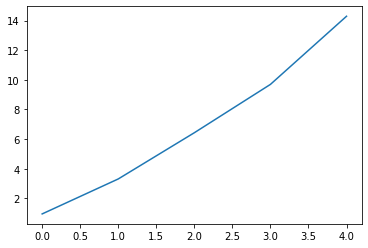

In [9]:
# !conda install -y xgboost
# !conda install -y lightgbm
# !conda install -y catboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# print(y_digits[:5])
index = 1
print("Result for XGBoost:")

time_list = []
for X in X_datasets_digits:
    start = time.time()
    y_tiled = np.tile(y_train, index)    
    gbm = XGBClassifier(max_depth=3, n_estimators=300,learning_rate=0.05, use_label_encoder=False, eval_metric='mlogloss').fit(X, y_tiled)
    y_pred = gbm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Size is", index, " times of the origin, result accuracy=", accuracy)
    index += 1
    time_list.append(time.time() - start)
    
print(f"Time spent {time_list}")
plt.plot(time_list)

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.563494
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.525486
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.505947
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.498311
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.493707


Result for LightGBM: 
Size is 1 times of the origin, result accuracy= 0.9314814814814815
Size is 2 times of the origin, result accuracy= 0.937037037037037
Size is 3 times of the origin, result accuracy= 0.95
Size is 4 times of the origin, result accuracy= 0.94444

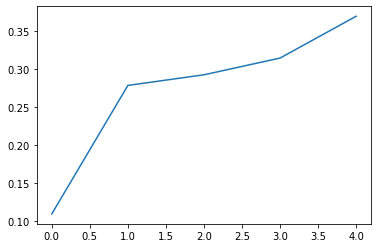

In [10]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer

result_str = "\n\nResult for LightGBM: \n"
index = 1
time_list = []
for X in X_datasets_digits:
    start = time.time()
    y_tiled = np.tile(y_train, index)
    lgb_train = lgb.Dataset(X, y_tiled)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    # specify your configurations as a dict
    params = {
     'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 10,
     'metric': 'multi_logloss','num_leaves': 31,
     'learning_rate': 0.05,'feature_fraction': 0.9,
     'bagging_fraction': 0.8,'bagging_freq': 5,
     'verbose': -1
    }
    # training the model
    gbm = lgb.train(params,
     lgb_train,
     num_boost_round=20,
     valid_sets=lgb_eval,
     verbose_eval = 0,
     callbacks=[lgb.early_stopping(stopping_rounds=5)])

    # prediction
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    y_pred_class = np.argmax(y_pred, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred_class)
    result_str += (f"Size is {index} times of the origin, result accuracy= {accuracy}\n")
    index += 1
    time_list.append(time.time() - start)
    
print(result_str)
print(f"Time spent {time_list}")
plt.plot(time_list)



Result for CatBoost: 
Size is 1 times of the origin, result accuracy= 0.9611111111111111
Size is 2 times of the origin, result accuracy= 0.9666666666666667
Size is 3 times of the origin, result accuracy= 0.9703703703703703
Size is 4 times of the origin, result accuracy= 0.9592592592592593
Size is 5 times of the origin, result accuracy= 0.9722222222222222

Time spent [0.34865856170654297, 1.2929983139038086, 1.3709995746612549, 1.4469997882843018, 1.5179731845855713]


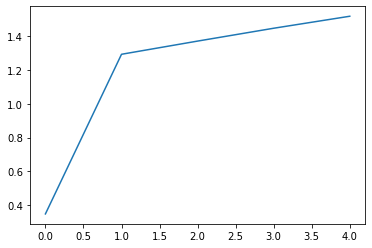

In [11]:
from catboost import CatBoostClassifier

result_str = "\n\nResult for CatBoost: \n"
index = 1
time_list = []
for X in X_datasets_digits:
    start = time.time()
    y_tiled = np.tile(y_train, index)
    
    # Initialize CatBoostRegressor
    model = CatBoostClassifier(iterations=50,
     learning_rate=0.19,loss_function='MultiClass', verbose=0,
     depth=5)
    # Fit model
    model.fit(X, y_tiled)
    # Get predictions
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    result_str += (f"Size is {index} times of the origin, result accuracy= {accuracy}\n")
    index += 1
    time_list.append(time.time() - start)
    
print(result_str)
print(f"Time spent {time_list}")
plt.plot(time_list)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_mnist_images, y_mnist_labels, test_size=0.3, random_state=1)
X_mnist_datasets = generate_datasets(X_train, augment_image_28x28)

Result for XGBoost:
Size is 1  times of the origin, result accuracy= 0.9272222222222222
Size is 2  times of the origin, result accuracy= 0.9311111111111111
Size is 3  times of the origin, result accuracy= 0.9322222222222222
Size is 4  times of the origin, result accuracy= 0.9255555555555556
Size is 5  times of the origin, result accuracy= 0.9305555555555556
Time spent [29.996980667114258, 195.34919381141663, 364.63635540008545, 535.5972640514374, 706.0142600536346]


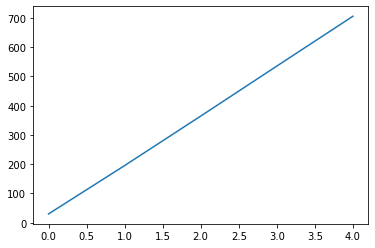

In [13]:
######################
# start mnist datasets
#####################


# print(y_digits[:5])
index = 1
print("Result for XGBoost:")
time_list = []

for X in X_mnist_datasets:
    start = time.time()
    y_tiled = np.tile(y_train, index)    
    gbm = XGBClassifier(max_depth=3, n_estimators=300,learning_rate=0.05, use_label_encoder=False, eval_metric='mlogloss').fit(X, y_tiled)
    y_pred = gbm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Size is", index, " times of the origin, result accuracy=", accuracy)
    index += 1
    time_list.append(time.time() - start)
    
print(f"Time spent {time_list}")
plt.plot(time_list)

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.633419
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.589007
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.577885
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.58022
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.578197


Result for LightGBM: 
Size is 1 times of the origin, result accuracy= 0.9055555555555556
Size is 2 times of the origin, result accuracy= 0.9172222222222223
Size is 3 times of the origin, result accuracy= 0.9216666666666666
Size is 4 times of the origin, result acc

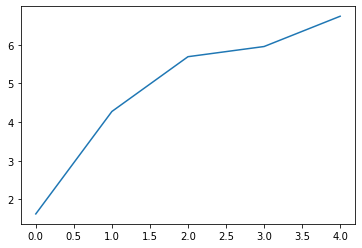

In [14]:


result_str = "\n\nResult for LightGBM: \n"
index = 1
time_list = []
for X in X_mnist_datasets:
    start = time.time()
    y_tiled = np.tile(y_train, index)
    lgb_train = lgb.Dataset(X, y_tiled)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    # specify your configurations as a dict
    params = {
     'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 10,
     'metric': 'multi_logloss','num_leaves': 31,
     'learning_rate': 0.05,'feature_fraction': 0.9,
     'bagging_fraction': 0.8,'bagging_freq': 5,
     'verbose': -1
    }
    # training the model
    gbm = lgb.train(params,
     lgb_train,
     num_boost_round=20,
     valid_sets=lgb_eval,
     verbose_eval = 0,
     callbacks=[lgb.early_stopping(stopping_rounds=5)])

    # prediction
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    y_pred_class = np.argmax(y_pred, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred_class)
    result_str += (f"Size is {index} times of the origin, result accuracy= {accuracy}\n")
    index += 1
    time_list.append(time.time() - start)
    
print(result_str)
print(f"Time spent {time_list}")
plt.plot(time_list)



Result for CatBoost: 
Size is 1 times of the origin, result accuracy= 0.9066666666666666
Size is 2 times of the origin, result accuracy= 0.9172222222222223
Size is 3 times of the origin, result accuracy= 0.9144444444444444
Size is 4 times of the origin, result accuracy= 0.9211111111111111
Size is 5 times of the origin, result accuracy= 0.9266666666666666

Time spent [7.593669176101685, 16.39145541191101, 18.411999225616455, 21.25804615020752, 23.234034061431885]


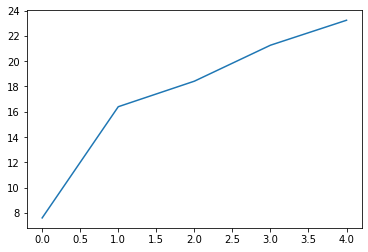

In [15]:

result_str = "\n\nResult for CatBoost: \n"
index = 1
time_list = []
for X in X_mnist_datasets:
    start = time.time()
    y_tiled = np.tile(y_train, index)
    
    # Initialize CatBoostRegressor
    model = CatBoostClassifier(iterations=50,
     learning_rate=0.19,loss_function='MultiClass', verbose=0,
     depth=5)
    # Fit model
    model.fit(X, y_tiled)
    # Get predictions
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    result_str += (f"Size is {index} times of the origin, result accuracy= {accuracy}\n")
    index += 1
    time_list.append(time.time() - start)
    
print(result_str)
print(f"Time spent {time_list}")
plt.plot(time_list)